Implement Linear Regression Model Using Valorant Esports

Part 1 – Import the required Python, Pandas, Matplotlib, Seaborn packages

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
anime_data = pd.read_csv("/content/top250_anime.csv")
anime_data.head()

,Rank,Title,Popularity,Genre,Studio,Type,Episodes,Duration,Start_date,End_date,Members,Score
0,1,Shingeki no Kyojin: The Final Season - Kankets...,609,"Action, Drama, Suspense",MAPPA,Special,2.0,61,23-Mar,2023,347875.0,9.17
1,2,Fullmetal Alchemist: Brotherhood,3,"Action, Adventure, Drama, Fantasy",Bones,TV,64.0,24,9-Apr,10-Jul,3109951.0,9.11
2,3,Bleach: Sennen Kessen-hen,508,"Action, Adventure, Fantasy",Pierrot,TV,13.0,24,22-Oct,22-Dec,404036.0,9.09
3,4,Steins;Gate,13,"Drama, Sci-Fi, Suspense",White Fox,TV,24.0,24,11-Apr,11-Sep,2393767.0,9.08
4,5,Gintama°,335,"Action, Comedy, Sci-Fi",Bandai Namco Pictures,TV,51.0,24,15-Apr,16-Mar,581994.0,9.07


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
anime_data = pd.read_csv("/content/top250_anime.csv")
anime_data.tail()

,Rank,Title,Popularity,Genre,Studio,Type,Episodes,Duration,Start_date,End_date,Members,Score
245,246,Blue Lock,439,Sports,8bit,TV,24.0,24,22-Oct,23-Mar,459426.0,8.30
246,247,Detective Conan Movie 06: The Phantom of Baker...,2289,"Adventure, Mystery",TMS Entertainment,Movie,1.0,107,2-Apr,2-Apr,73487.0,8.30
247,248,Diamond no Ace: Second Season,1541,Sports,"Production I.G, Madhouse",TV,51.0,24,15-Apr,16-Mar,130376.0,8.30
248,249,Hibike! Euphonium 2,1017,Drama,Kyoto Animation,TV,13.0,23,16-Oct,16-Dec,213707.0,8.30
249,250,Ashita no Joe,2112,"Drama, Sports",Mushi Production,TV,79.0,25,Apr-70,Sep-71,83604.0,8.29


Generate a summary of the dataset for min, max, stddev, quartile vales for 25%, 50%, 75%, 90%

In [ ]:
anime_data.mean()

<ipython-input-4-215289cf5eec>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  anime_data.mean()


Rank             125.500000
Popularity       855.460000
Episodes          17.791165
Duration          41.720000
Members       664259.217742
Score              8.546680
dtype: float64

In [ ]:
anime_data.mean(axis=1)

<ipython-input-5-ffc3b9187a22>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  anime_data.mean(axis=1)


0       58092.861667
1      518342.185000
2       67432.181667
3      398973.513333
4       97069.678333
           ...      
245     76694.550000
246     12689.883333
247     22041.383333
248     35836.216667
249     14346.381667
Length: 250, dtype: float64

In [ ]:
anime_data.median()

<ipython-input-6-a0e15f33cfda>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  anime_data.median()


Rank             125.500
Popularity       490.000
Episodes          12.000
Duration          24.000
Members       415455.000
Score              8.505
dtype: float64

In [ ]:
anime_data.mode()

,Rank,Title,Popularity,Genre,Studio,Type,Episodes,Duration,Start_date,End_date,Members,Score
0,1,3-gatsu no Lion,1,Sports,Madhouse,TV,1.0,24.0,22-Oct,22-Dec,10566.0,8.33
1,2,3-gatsu no Lion 2nd Season,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14905.0,NaN
2,3,86 Part 2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15885.0,NaN
3,4,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17321.0,NaN
4,5,Ansatsu Kyoushitsu 2nd Season,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22408.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Yuru Camp△ Movie,4273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3109951.0,NaN
246,247,Yuru Camp△ Season 2,4781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3646544.0,NaN
247,248,Yuu☆Yuu☆Hakusho,4936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3673536.0,NaN
248,249,Zoku Natsume Yuujinchou,5046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
anime_data.max()

<ipython-input-11-c5f7577be1e2>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  anime_data.max()


Rank                           250
Title         Zoku Owarimonogatari
Popularity                    5794
Type                            TV
Episodes                     201.0
Duration                       161
Start_date                  Oct-99
Members                  3673536.0
Score                         9.17
dtype: object

In [ ]:
anime_data.min()

<ipython-input-12-441b44daff62>:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  anime_data.min()


Rank                        1
Title         3-gatsu no Lion
Popularity                  1
Type                    Movie
Episodes                  1.0
Duration                    3
Start_date            #VALUE!
Members               10566.0
Score                    8.29
dtype: object

In [ ]:
max(anime_data["Members"])

3673536.0

In [ ]:
max(anime_data["Members"]) - min(anime_data["Members"])

3662970.0

In [ ]:
five_num = [anime_data["Duration"].quantile(0),
             anime_data["Duration"].quantile(0.25),
             anime_data["Duration"].quantile(0.5),
             anime_data["Duration"].quantile(0.75),
             anime_data["Duration"].quantile(0.9)]
five_num

[3.0, 23.0, 24.0, 29.0, 110.19999999999999]

In [ ]:
import statistics
statistics.stdev(anime_data["Duration"])

35.67717819806811

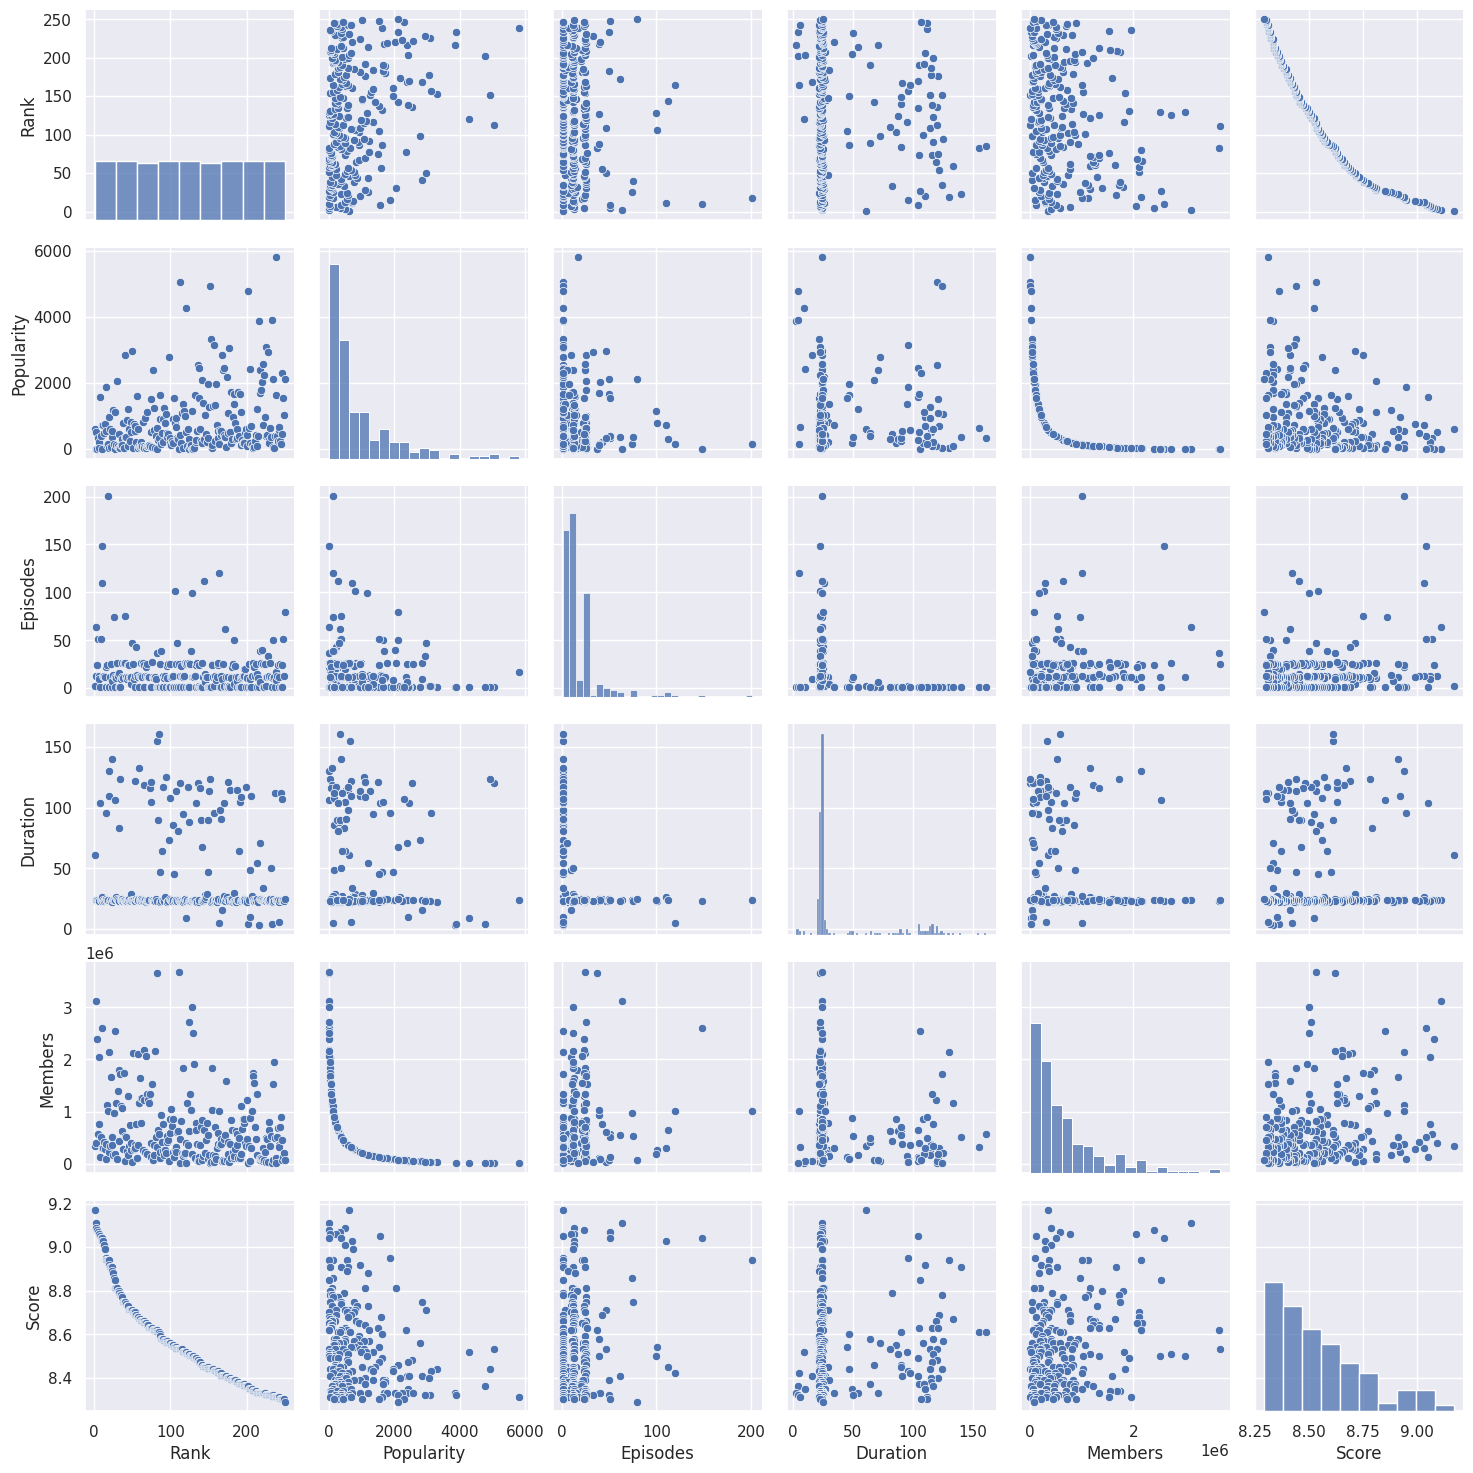

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

anime = pd.read_csv('/content/top250_anime.csv')

sns.pairplot(anime)
plt.show()

<Axes: ylabel='Frequency'>

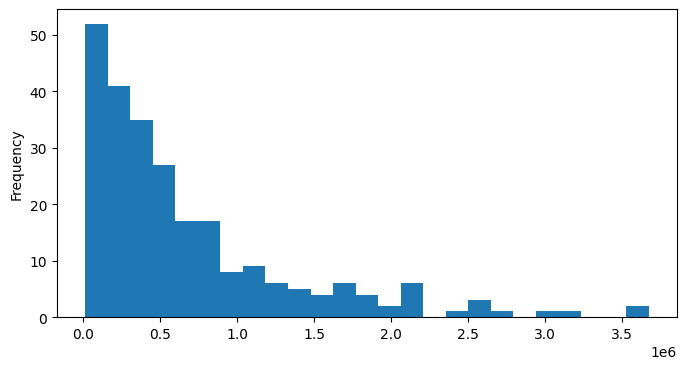

In [23]:
anime['Members'].plot.hist(bins=25,figsize=(8,4))


<Axes: ylabel='Density'>

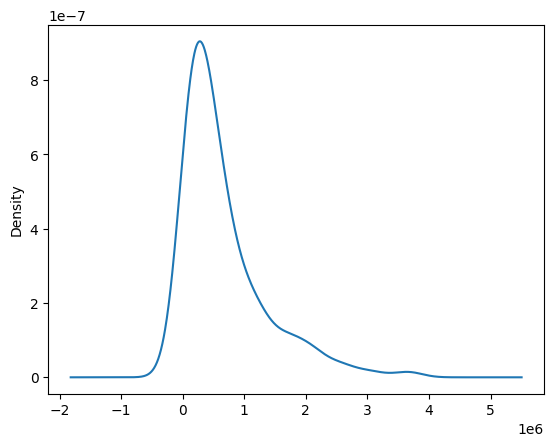

In [24]:
anime['Members'].plot.density()

In [25]:
anime.corr()

<ipython-input-25-778dfa6dc03f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  anime.corr()


,Rank,Popularity,Episodes,Duration,Members,Score
Rank,1.000000,0.245049,-0.124777,-0.068753,-0.238958,-0.948081
Popularity,0.245049,1.000000,-0.148066,0.045086,-0.583522,-0.232667
Episodes,-0.124777,-0.148066,1.000000,-0.360851,0.167256,0.179424
Duration,-0.068753,0.045086,-0.360851,1.000000,-0.108749,0.040305
Members,-0.238958,-0.583522,0.167256,-0.108749,1.000000,0.241012
Score,-0.948081,-0.232667,0.179424,0.040305,0.241012,1.000000


<ipython-input-26-b0a087cc097f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(anime.corr(),annot=True,linewidths=2)


<Axes: >

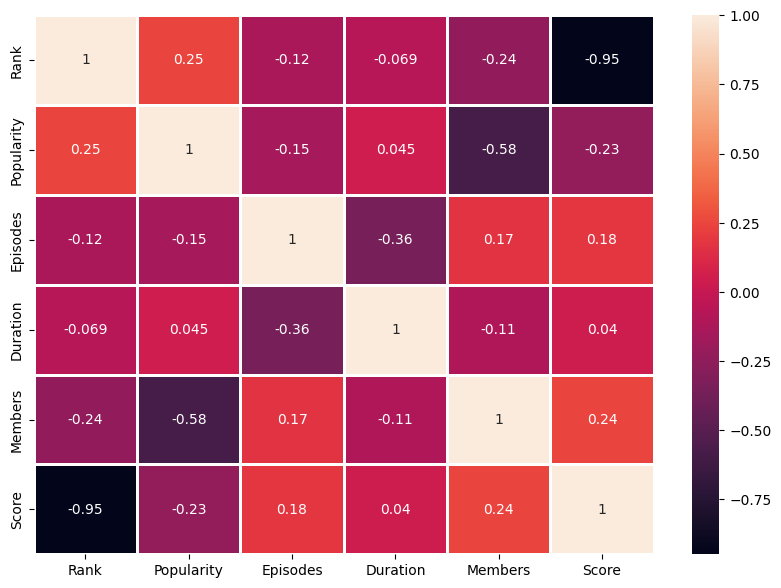

In [26]:
plt.figure(figsize=(10,7))
sns.heatmap(anime.corr(),annot=True,linewidths=2)

Part 2 – Model training and Fit the data to Model

In [43]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [44]:
import seaborn as sns
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

In [45]:
X = df[l_column[0:len_feature-2]]
y = df[l_column[len_feature-2]]
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (5000, 5)
Variable set size: (5000,)


In [46]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [47]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (3500, 5)
Test feature set size: (1500, 5)
Training variable set size: (3500,)
Test variable set size: (1500,)


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable


LinearRegression()

In [50]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: -2631028.9017454907


In [51]:
print("The coefficients of the linear model:", lm.coef_)


The coefficients of the linear model: [2.15976020e+01 1.65201105e+05 1.19061464e+05 3.21258561e+03
 1.52281212e+01]


In [52]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
Avg. Area Income,21.597602
Avg. Area House Age,165201.104954
Avg. Area Number of Rooms,119061.463868
Avg. Area Number of Bedrooms,3212.585606
Area Population,15.228121


Part 3 – Model Evaluation Metrics

In [53]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[
        list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
Avg. Area Income,21.597602,0.160361,134.681505
Avg. Area House Age,165201.104954,1722.412068,95.912649
Avg. Area Number of Rooms,119061.463868,1696.546476,70.178722
Avg. Area Number of Bedrooms,3212.585606,1376.451759,2.333962
Area Population,15.228121,0.169882,89.639472


In [54]:
print("Therefore, features arranged in the order of importance for predicting the house price\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Therefore, features arranged in the order of importance for predicting the house price
------------------------------------------------------------------------------------------
Avg. Area Income > 
Avg. Area House Age > 
Area Population > 
Avg. Area Number of Rooms > 
Avg. Area Number of Bedrooms


Text(0.5, 1.0, 'Area Population vs. Price')

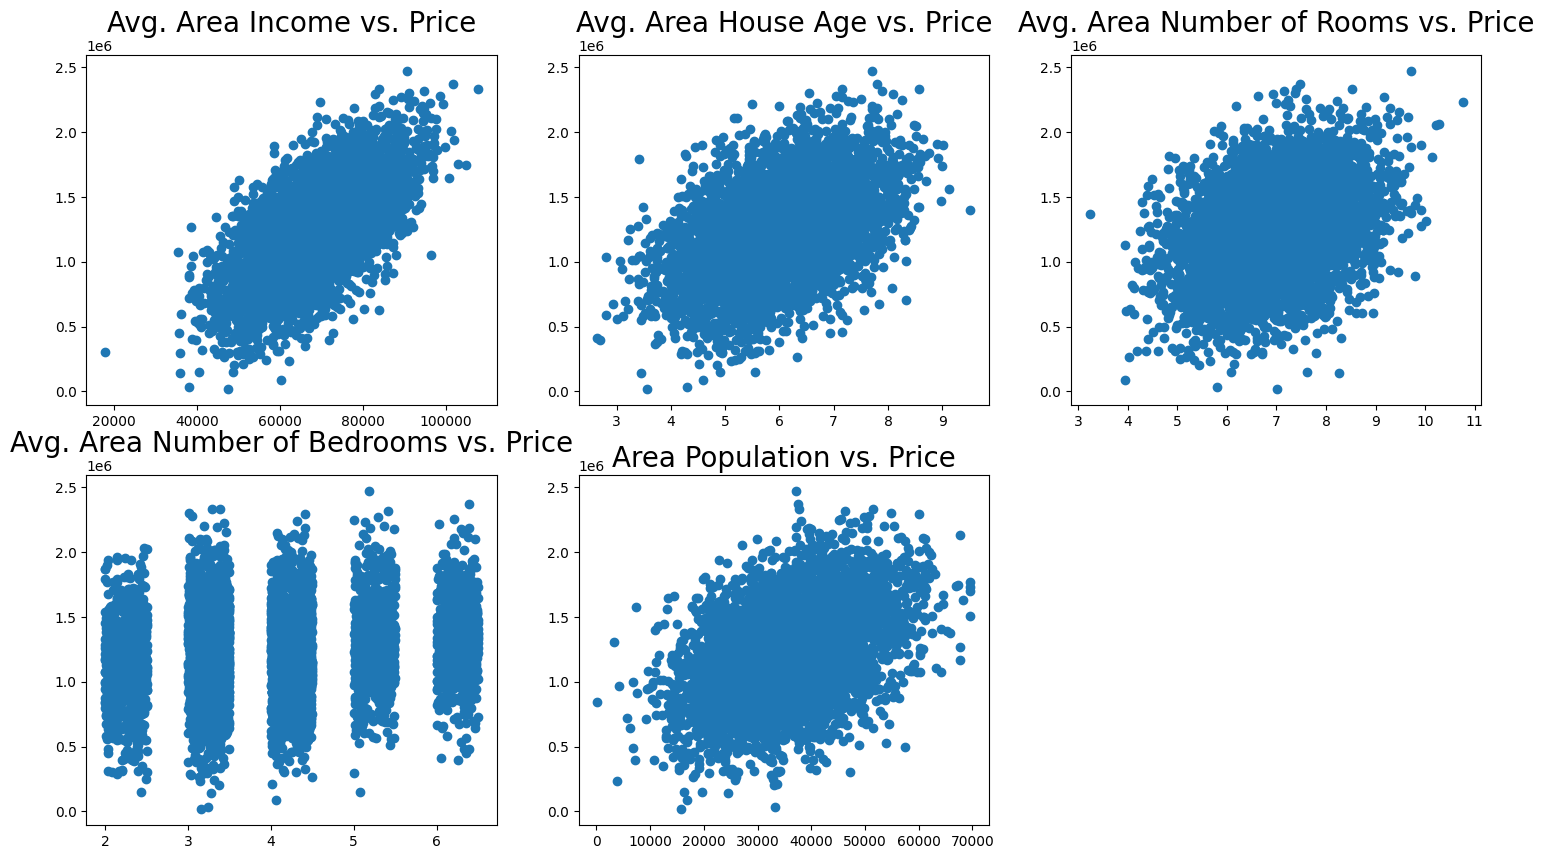

In [55]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
ax0 = plt.subplot(gs[0])
ax0.scatter(df[l[0]],df['Price'])
ax0.set_title(l[0]+" vs. Price", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(df[l[1]],df['Price'])
ax1.set_title(l[1]+" vs. Price",fontdict={'fontsize':20})

ax2 = plt.subplot(gs[2])
ax2.scatter(df[l[2]],df['Price'])
ax2.set_title(l[2]+" vs. Price",fontdict={'fontsize':20})

ax3 = plt.subplot(gs[3])
ax3.scatter(df[l[3]],df['Price'])
ax3.set_title(l[3]+" vs. Price",fontdict={'fontsize':20})

ax4 = plt.subplot(gs[4])
ax4.scatter(df[l[4]],df['Price'])
ax4.set_title(l[4]+" vs. Price",fontdict={'fontsize':20})

In [65]:
print("R-squared value of this fit:",round(metrics.r2_score(y_train,train_pred),3))

R-squared value of this fit: 0.917


In [66]:
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1500,)


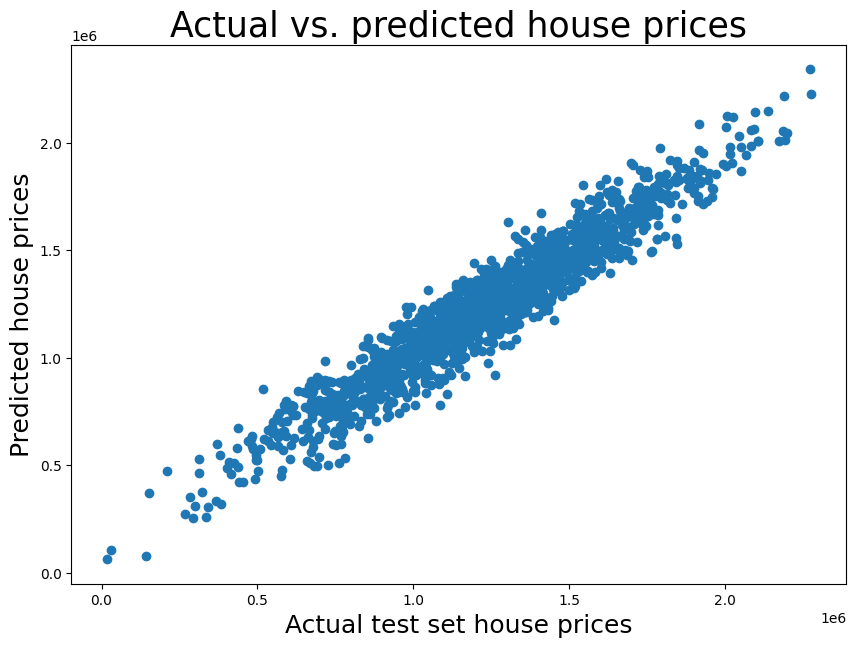

In [67]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test,y=predictions)

<Axes: title={'center': 'Histogram of residuals to check for normality'}, xlabel='Residuals', ylabel='Kernel density'>

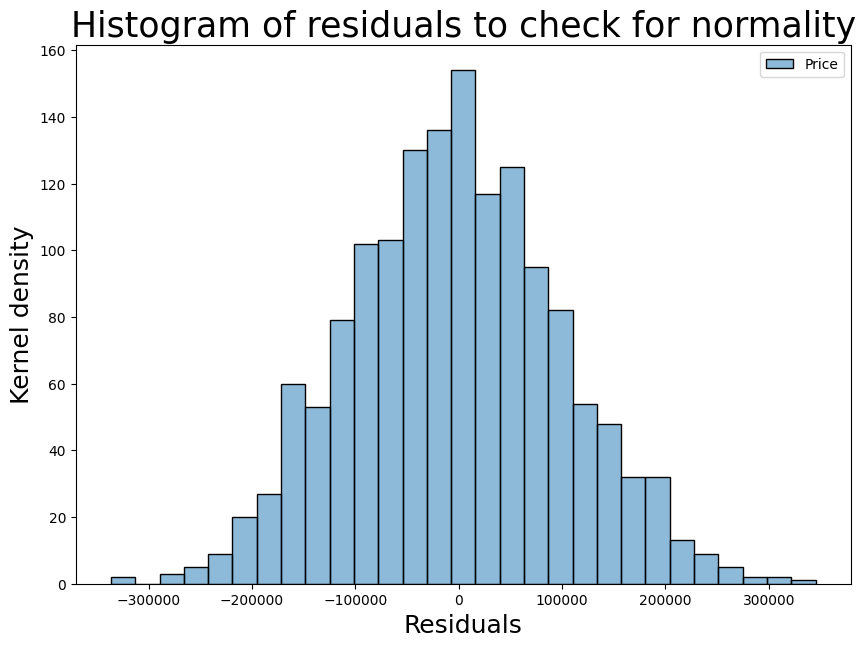

In [68]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.histplot([y_test-predictions])

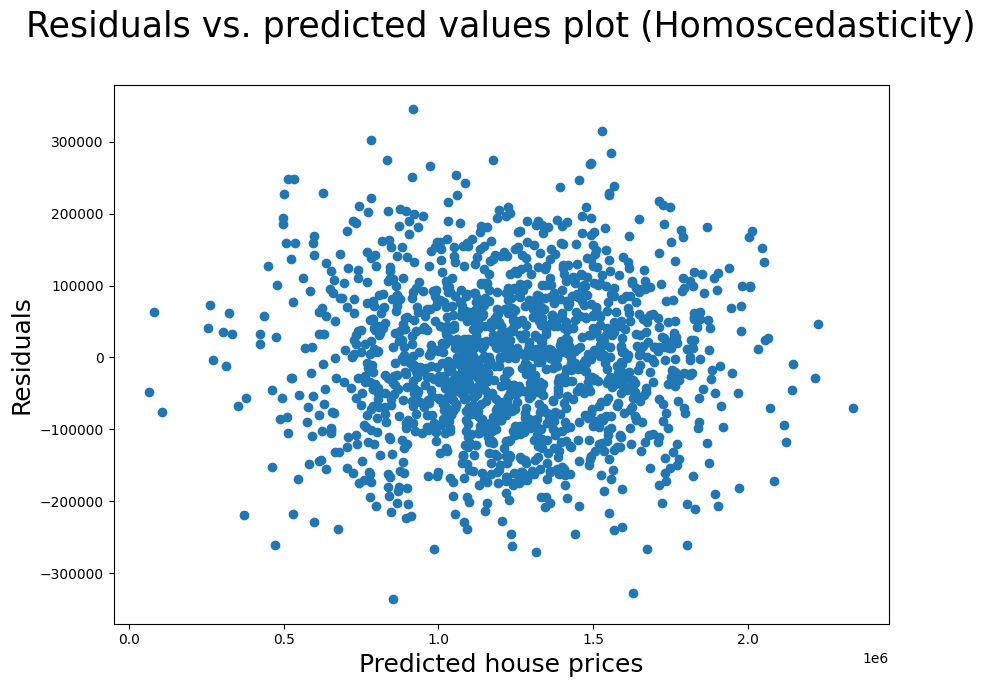

In [69]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot (Homoscedasticity)\n",fontsize=25)
plt.xlabel("Predicted house prices",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

In [70]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 81739.77482718184
Mean square error (MSE): 10489638335.804983
Root mean square error (RMSE): 102418.93543581179


In [71]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.919


Compute the MinMax value between Observed Price and Ex-
pected Price for the US Housing Data

In [72]:
#compute minmax value for observed price and expected price
import numpy as np
min=np.min(predictions/6000)
max=np.max(predictions/12000)
print(min, max)

10.57339854753646 195.14363973516853


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.01548743,  0.08451257,  0.18451257,  0.28451257,  0.38451257,
         0.48451257,  0.58451257,  0.68451257,  0.78451257,  0.88451257,
         0.98451257]),
 <BarContainer object of 10 artists>)

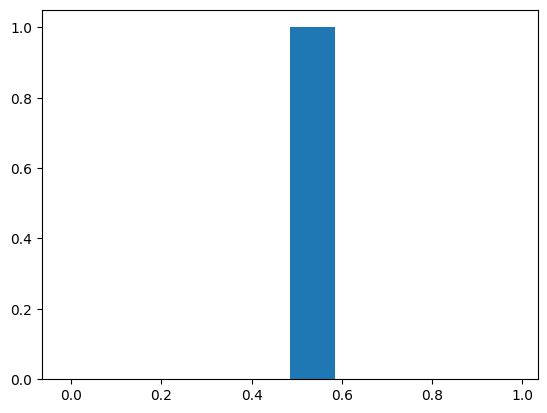

In [73]:
#Compute MinMax value for Price=100
L = (100 - min)/(max - min)
L
plt.hist(L)